In [ ]:
 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
from matplotlib import pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv("/content/drive/MyDrive/DS/horse.csv", sep=',', nrows=299)
is_null = pd.isnull(data).sum()
print('The number of empty values by column:')
print(is_null)

The number of empty values by column:
surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = data.drop(columns=['hospital_number', 'nasogastric_reflux_ph','abdomo_appearance','abdomo_protein']) #cuz many null values

print('Old Size: %d' % len(data))
data = data.dropna(how = 'any', axis = 'rows')
print('New Size: %d' % len(data))

print('Check that there are no empty values after cleaning:')
is_null = pd.isnull(data).sum()
print(is_null)
data.corr()

data2 = pd.get_dummies(data, columns =['surgery','age','capillary_refill_time','surgical_lesion',
                                       'cp_data','abdominal_distention','temp_of_extremities',
                                      'peripheral_pulse','mucous_membrane','pain','peristalsis',
                                       'nasogastric_reflux','nasogastric_tube','rectal_exam_feces','abdomen'])
data2.head()
#Change the values of the fields for the dead - 0, for the living - 1, euthanasia - NaN 
data2 = data2.replace({'outcome': {'lived': 1, 'died': 0, 'euthanized': np.nan}})
#Removing horses that have been euthanized 
data2 = data2.dropna(how = 'any', axis = 'rows')

Old Size: 299
New Size: 52
Check that there are no empty values after cleaning:
surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


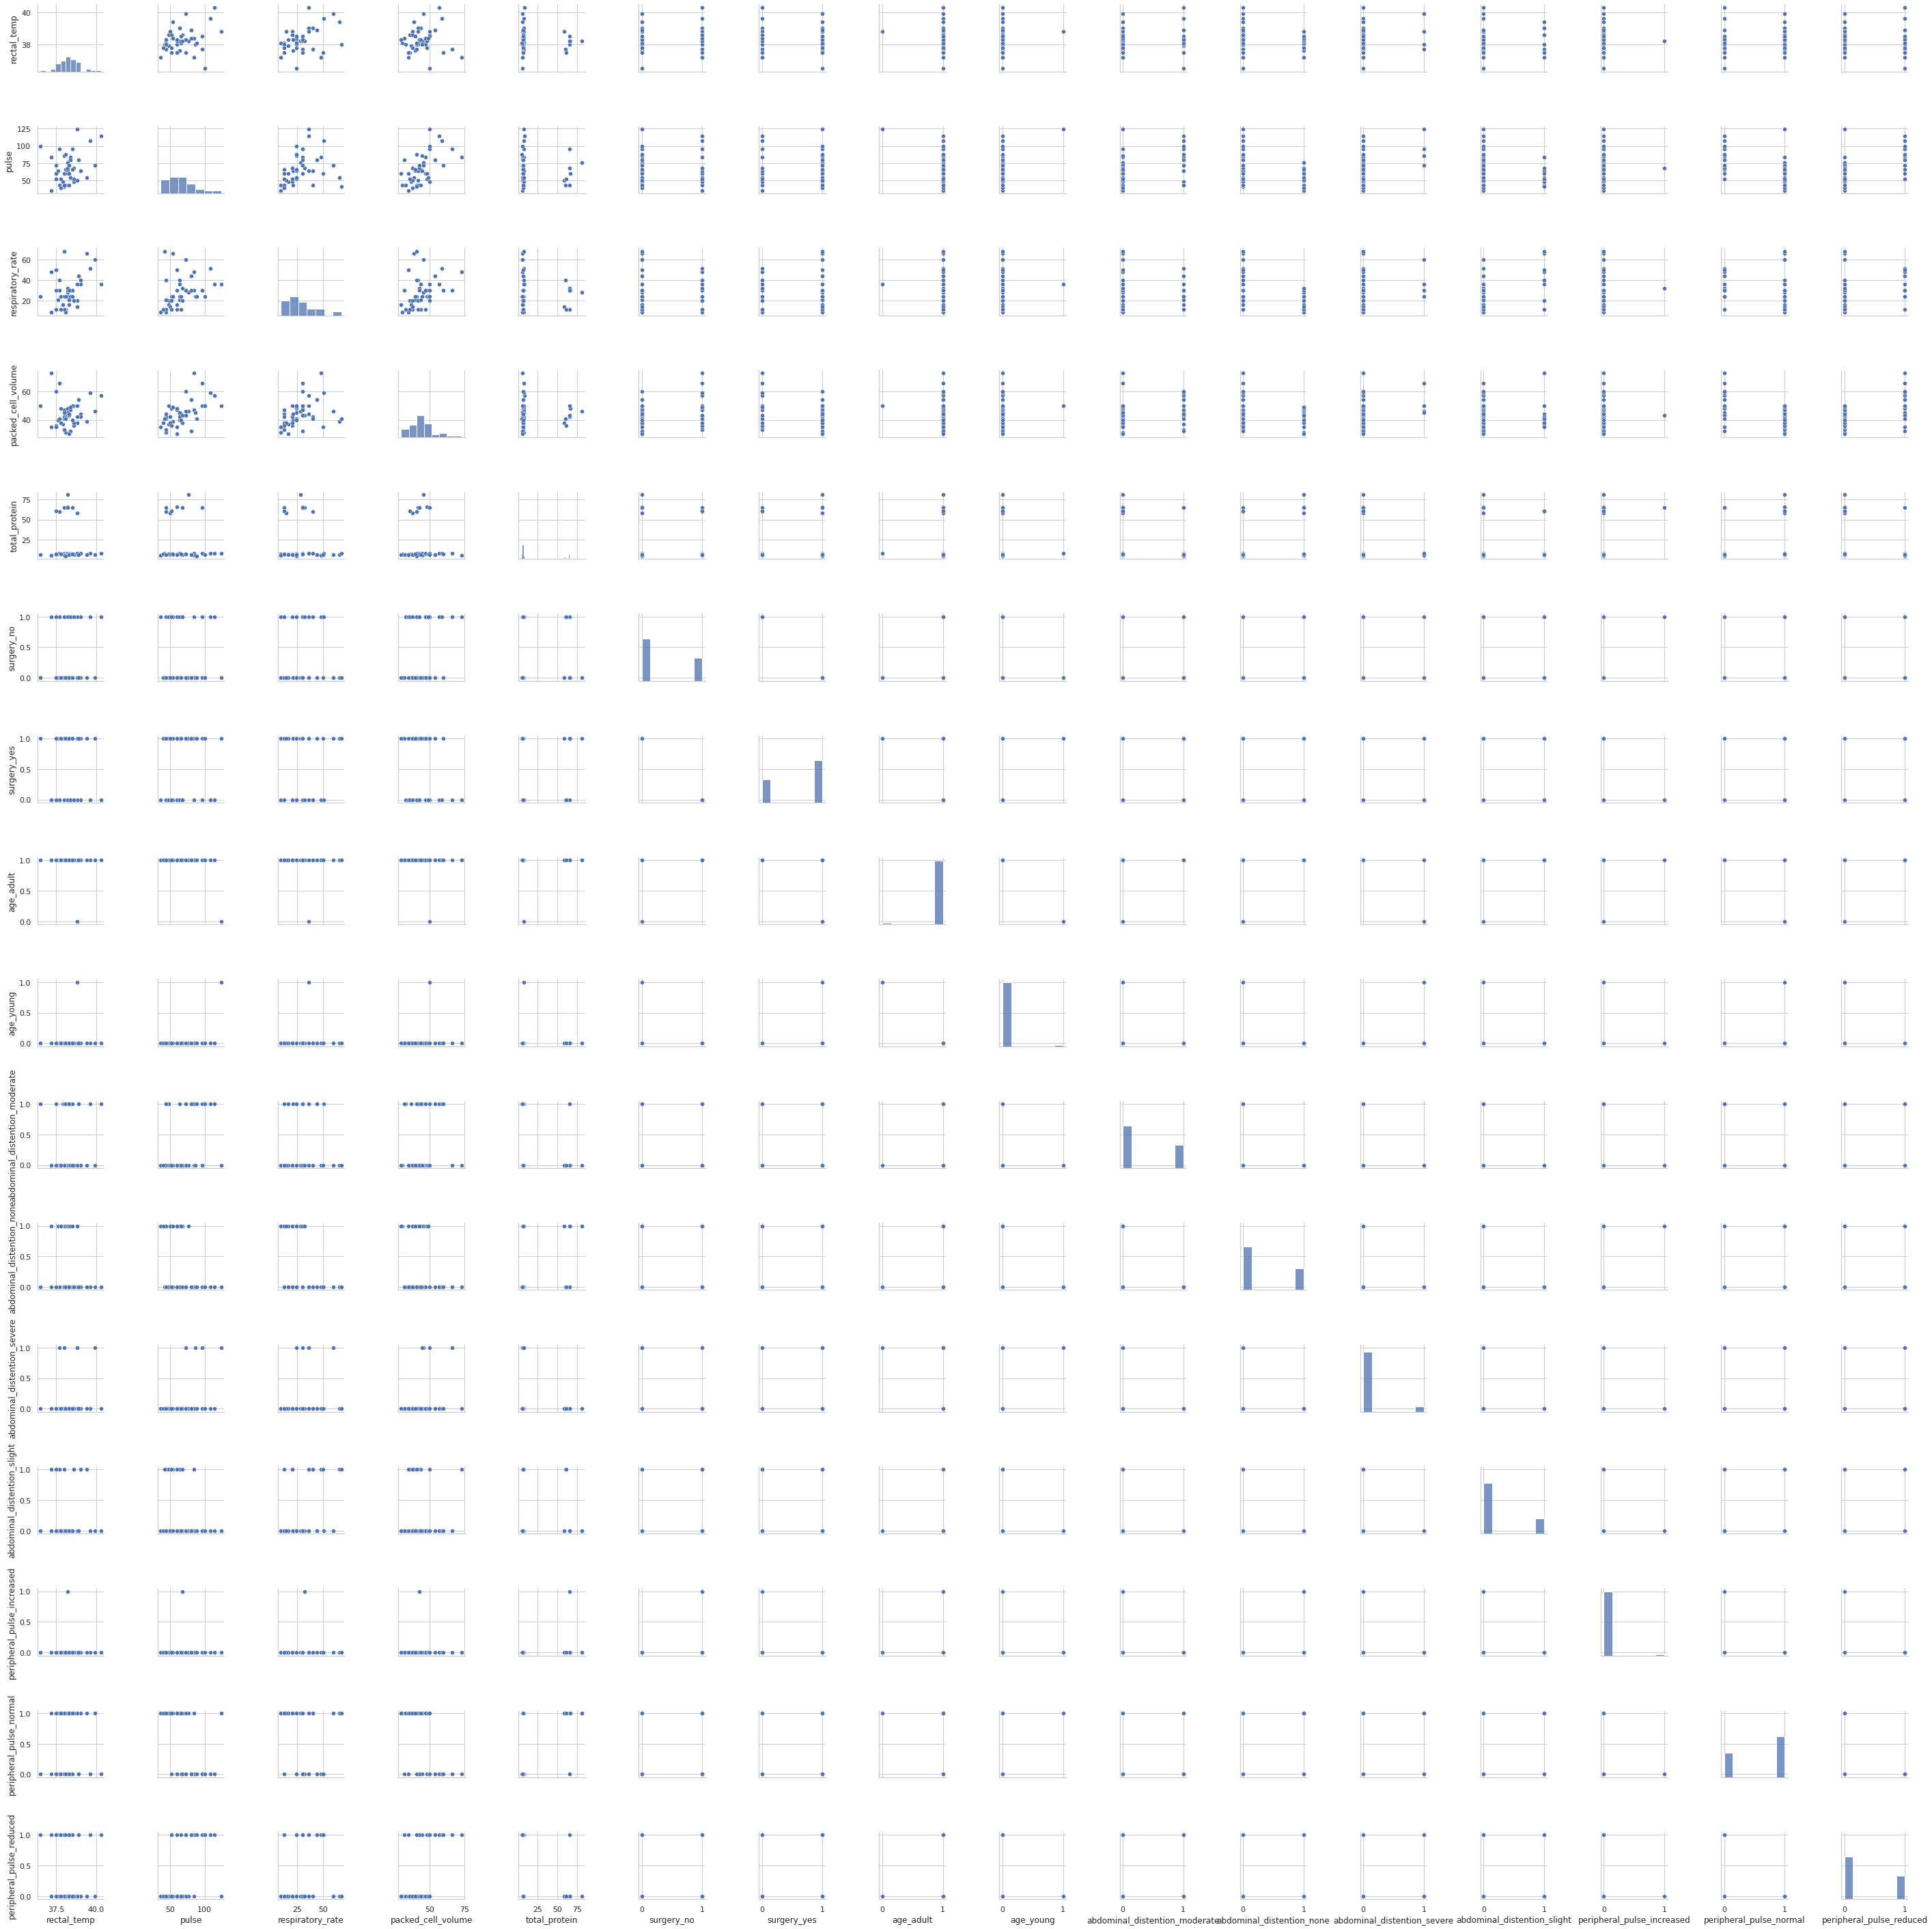

In [ ]:
Selected_features = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 
                     'surgery_no', 'surgery_yes', 'age_adult','age_young','abdominal_distention_moderate',
                     'abdominal_distention_none','abdominal_distention_severe','abdominal_distention_slight',
                    'peripheral_pulse_increased','peripheral_pulse_normal','peripheral_pulse_reduced']
#Calculation parameters
X = data2[Selected_features]
#Result for the calculation
y = data2['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


sns.pairplot(data2[Selected_features])

plt.show()

In [ ]:
from sklearn import metrics

clf = LogisticRegression(random_state=0,  max_iter=10000)
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Accuracy: %s' % metrics.accuracy_score(y_test, pred))


Mean Absolute Error: 0.16666666666666666
Accuracy: 0.8333333333333334



Conclusion: The horse colic dataset was classified using a Logistic Regression model, Pandas, numpy and sklearn giving a validation accuracy of 83.33%.




